<a href="https://colab.research.google.com/github/thiagorayam/RNA/blob/main/TransferLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Alunos:**

*   Priscylla Maria da Silva Sousa (12050002)
*   Thiago Rayam Souza Santos (11866379)



Importa as bibliotecas necessárias

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras
import pathlib
from tensorflow.keras import layers

Importa os dado

In [ ]:
path_to_downloaded_file = tf.keras.utils.get_file(fname='Dataset',
    origin='https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip',
    extract=True,
    cache_dir='/content/sample_data/')

68608000/68606236 [==============================] - 0s 0us/step


In [ ]:
path_to_downloaded_file

'/content/sample_data/datasets/Dataset'

In [ ]:
train_dir = pathlib.Path('/content/sample_data/datasets/cats_and_dogs_filtered/train')
val_dir = pathlib.Path('/content/sample_data/datasets/cats_and_dogs_filtered/validation')

As imagens serão importadas com base nas dimensões abaixo.

In [ ]:
batch_size = 32
img_height = 160
img_width = 160

In [ ]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_ds representa as imagens de treino.

In [ ]:
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
   )

Found 2000 images belonging to 2 classes.


val_ds representa as imagens utilizadas na validação.

In [ ]:
val_generator = datagen.flow_from_directory(
    val_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
   )

Found 1000 images belonging to 2 classes.


A classificação das imagens é feita com base nas classes abaixo.

In [ ]:
class_names = ['cat','dog']

As imagens abaixo apresentam as imagens obtidas a partir do banco de dados de treinamento.

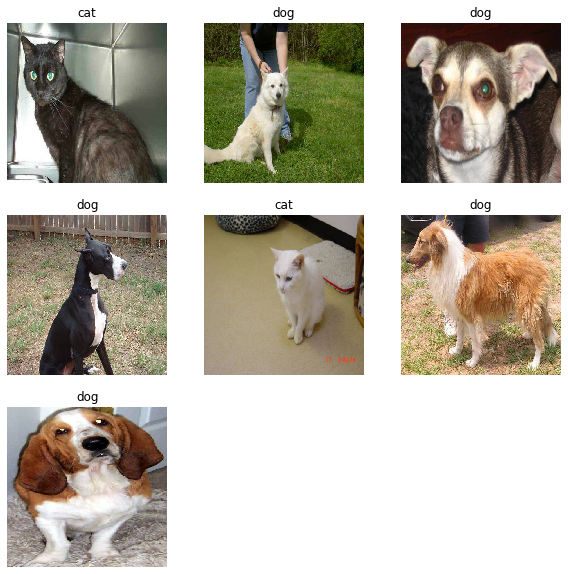

In [ ]:
images, labels = train_generator.next() 
plt.figure(figsize=(10, 10))
for i in range(7):
   ax = plt.subplot(3, 3, i + 1)
   plt.imshow(images[i])
   plt.title(class_names[int(labels[i])])
   plt.axis("off")

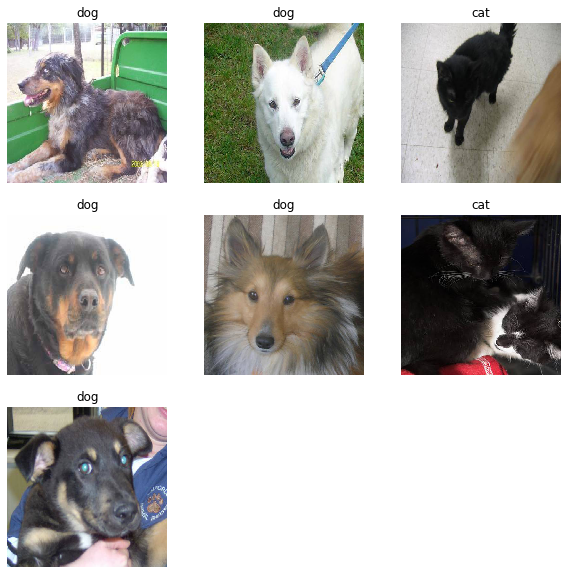

In [ ]:
images, labels = val_generator.next() 
plt.figure(figsize=(10, 10))
for i in range(7):
   ax = plt.subplot(3, 3, i + 1)
   plt.imshow(images[i])
   plt.title(class_names[int(labels[i])])
   plt.axis("off")

In [ ]:
from keras.applications import MobileNetV2

base_model=MobileNetV2(weights='imagenet',include_top=False, input_shape=(160,160,3))

In [ ]:
base_model.trainable = False

In [ ]:
from keras.layers import Dense,GlobalAveragePooling2D,BatchNormalization

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = BatchNormalization()(x)
x = Dense(160, activation='relu', bias_initializer='zeros')(x)
x = BatchNormalization()(x)
predictions = Dense(2, activation='softmax', kernel_initializer='random_uniform', bias_initializer='zeros')(x)

In [ ]:
from keras.models import Model
model = Model(inputs=base_model.input, outputs=predictions)

model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])


In [ ]:
model.summary()

In [ ]:
model.fit(
  train_generator,
  validation_data=val_generator,
  epochs=10
)

Epoch 1/10
63/63 [==============================] - 57s 901ms/step - loss: 0.3677 - accuracy: 0.9575 - val_loss: 0.3813 - val_accuracy: 0.9360
Epoch 2/10
63/63 [==============================] - 56s 890ms/step - loss: 0.3385 - accuracy: 0.9785 - val_loss: 0.3509 - val_accuracy: 0.9610
Epoch 3/10
63/63 [==============================] - 56s 887ms/step - loss: 0.3289 - accuracy: 0.9855 - val_loss: 0.3471 - val_accuracy: 0.9640
Epoch 4/10
63/63 [==============================] - 56s 881ms/step - loss: 0.3255 - accuracy: 0.9890 - val_loss: 0.3496 - val_accuracy: 0.9640
Epoch 5/10
63/63 [==============================] - 56s 884ms/step - loss: 0.3190 - accuracy: 0.9955 - val_loss: 0.3524 - val_accuracy: 0.9560
Epoch 6/10
63/63 [==============================] - 56s 884ms/step - loss: 0.3194 - accuracy: 0.9940 - val_loss: 0.3524 - val_accuracy: 0.9600
Epoch 7/10
63/63 [==============================] - 59s 930ms/step - loss: 0.3218 - accuracy: 0.9925 - val_loss: 0.3515 - val_accuracy: 0.9620

In [ ]:
image_batch, labels_batch = val_generator.next() 
predictions=model.predict(image_batch[0:9])

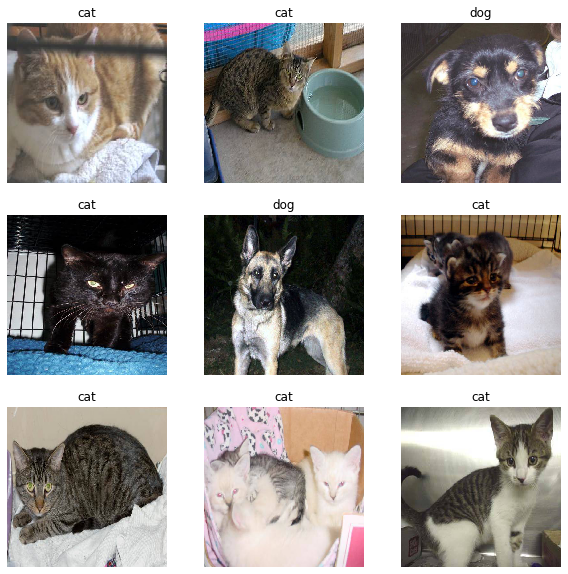

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image_batch[i])
  plt.title(class_names[np.argmax(predictions[i])])
  plt.axis("off")